# Exploratory Data Analysis

In [3]:
import sys
import pandas as pd
sys.path.append('../')
from utils.visualizations import numerical_univariate_analysis, categorical_univariate_analysis, features_vs_targets, facegrid_hist_target, plot_scatter_numericals_target

# Data

In [4]:
df = pd.read_csv("./CSV/clean_pred_maintenance.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (9973, 8)


,type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


# Univariate Analysis

## Numerical Columns

In [5]:
df.describe()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


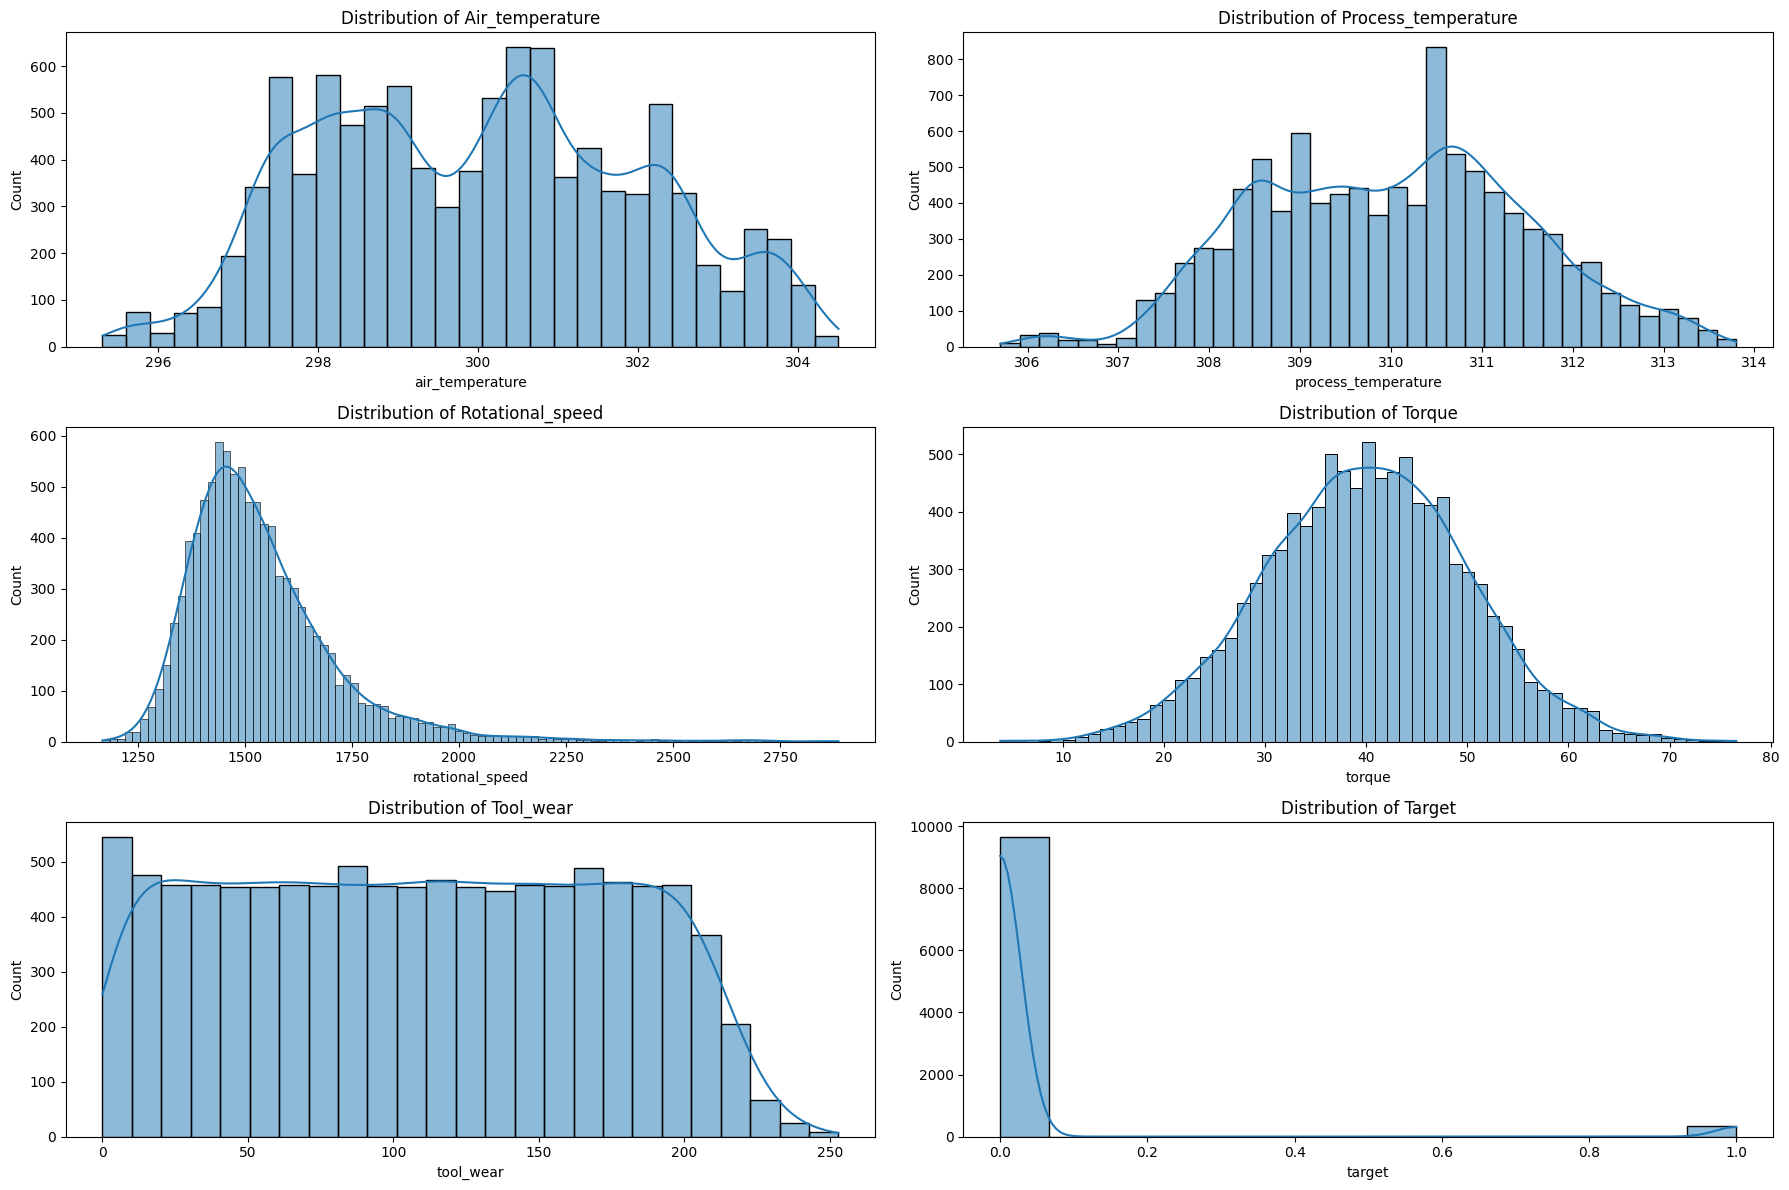

In [6]:
numerical_univariate_analysis(df, 3, 2)

In [7]:
df["target"].value_counts(normalize=True)

target
0    0.966911
1    0.033089
Name: proportion, dtype: float64

### Observations:
- All columns are very close to a normal distribution
- The `target` column is extremely unbalanced, with more than 96% of all data on the "no failure" class, determined by the 0
- The values of the columns are on different scales, with rotational_speed getting up to the thousands and torque staying in the tens
### Impact:
- In the future, some method of class balancing will be used in order to prevent the models from being extremely biased
- No method to change the distribution of the columns to be closely to a normal distribution will be needed
- Scaling the data will be necessary for better results 

## Categorical Columns

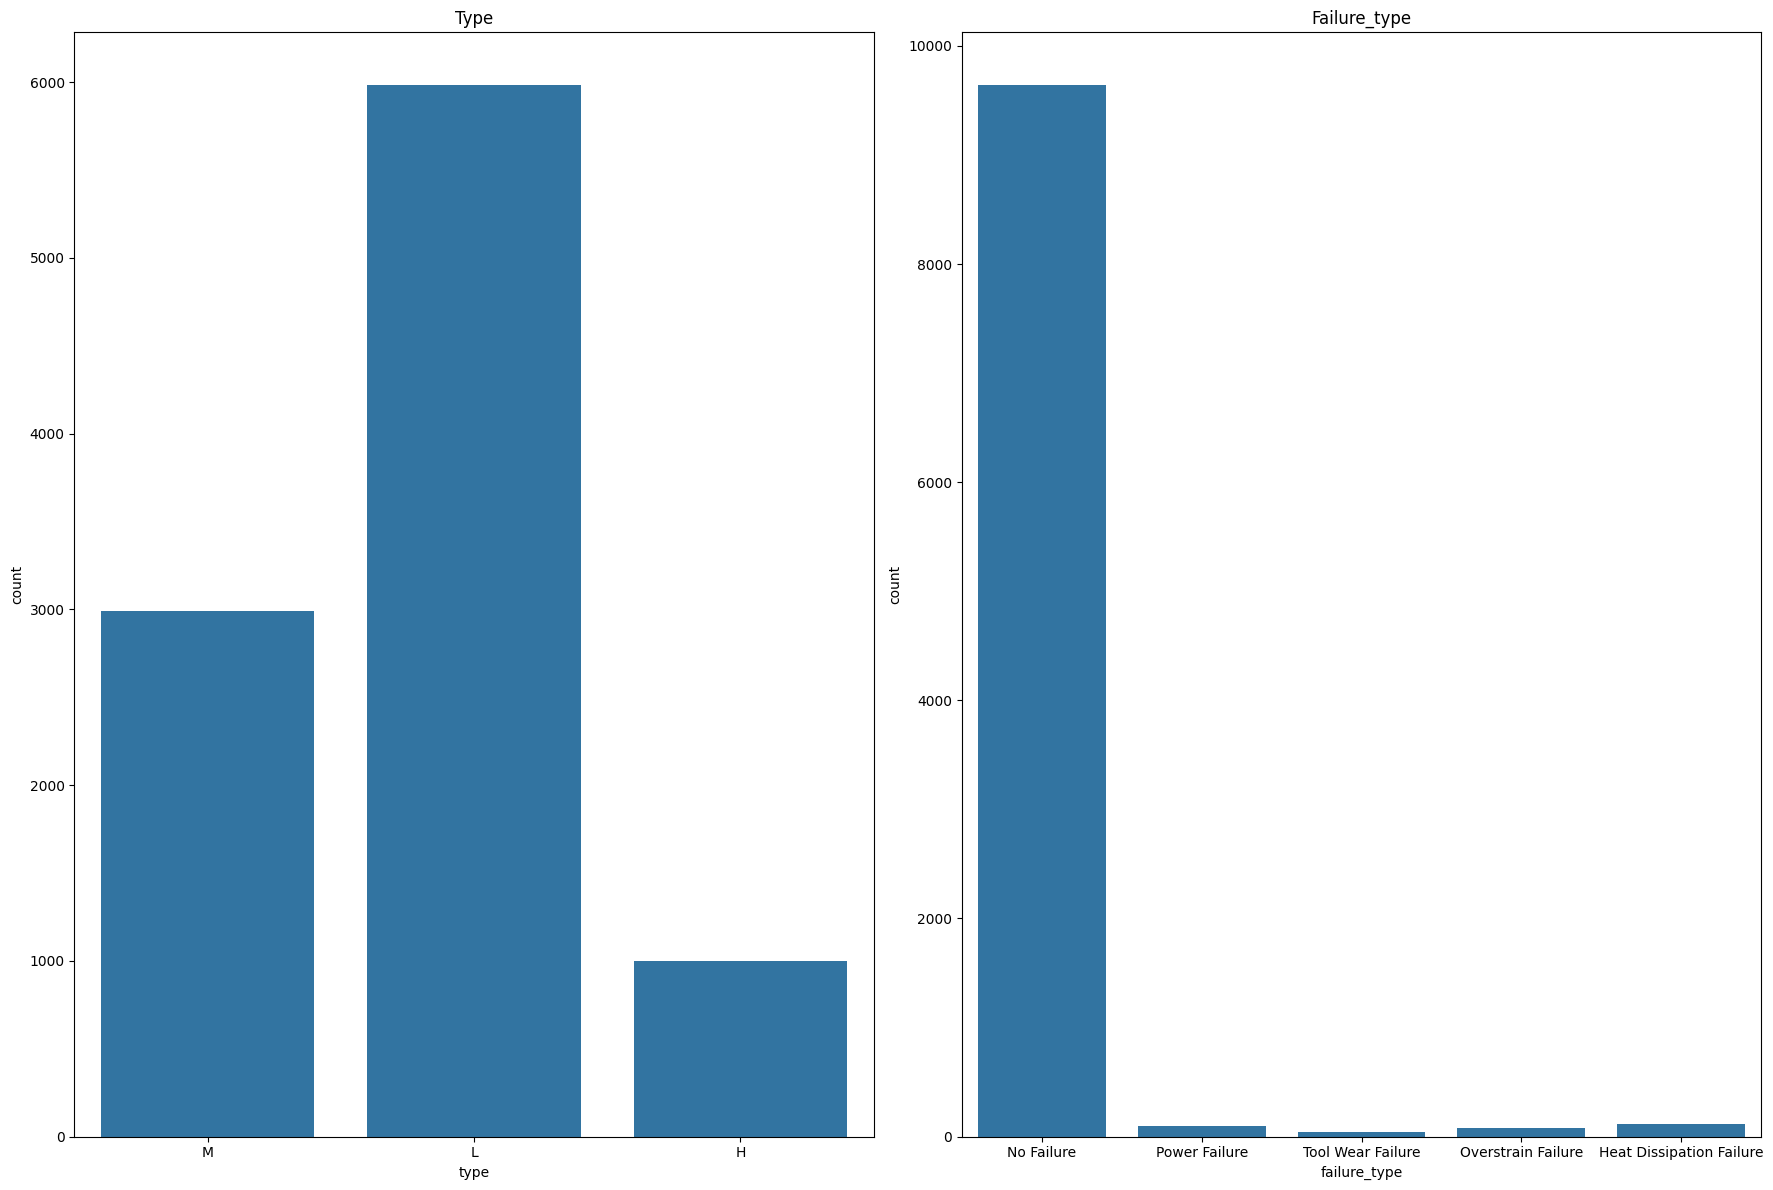

In [8]:
categorical_univariate_analysis(df, 1, 2)

In [9]:
print(df["failure_type"].value_counts(normalize=True), df["type"].value_counts(normalize=True))

failure_type
No Failure                  0.966911
Heat Dissipation Failure    0.011230
Power Failure               0.009526
Overstrain Failure          0.007821
Tool Wear Failure           0.004512
Name: proportion, dtype: float64 type
L    0.60002
M    0.29991
H    0.10007
Name: proportion, dtype: float64


### Observations:
- Just like the `target` column, `failure_type` is also extremely unbalanced
- Low quality products are the most produced ones, representing 60% of all products
### Impact:
- Since the objective is to create a model to predict if the machine will fail or not, the `failure_type` column can be used during the data analysis and then discarded

# Features x Target

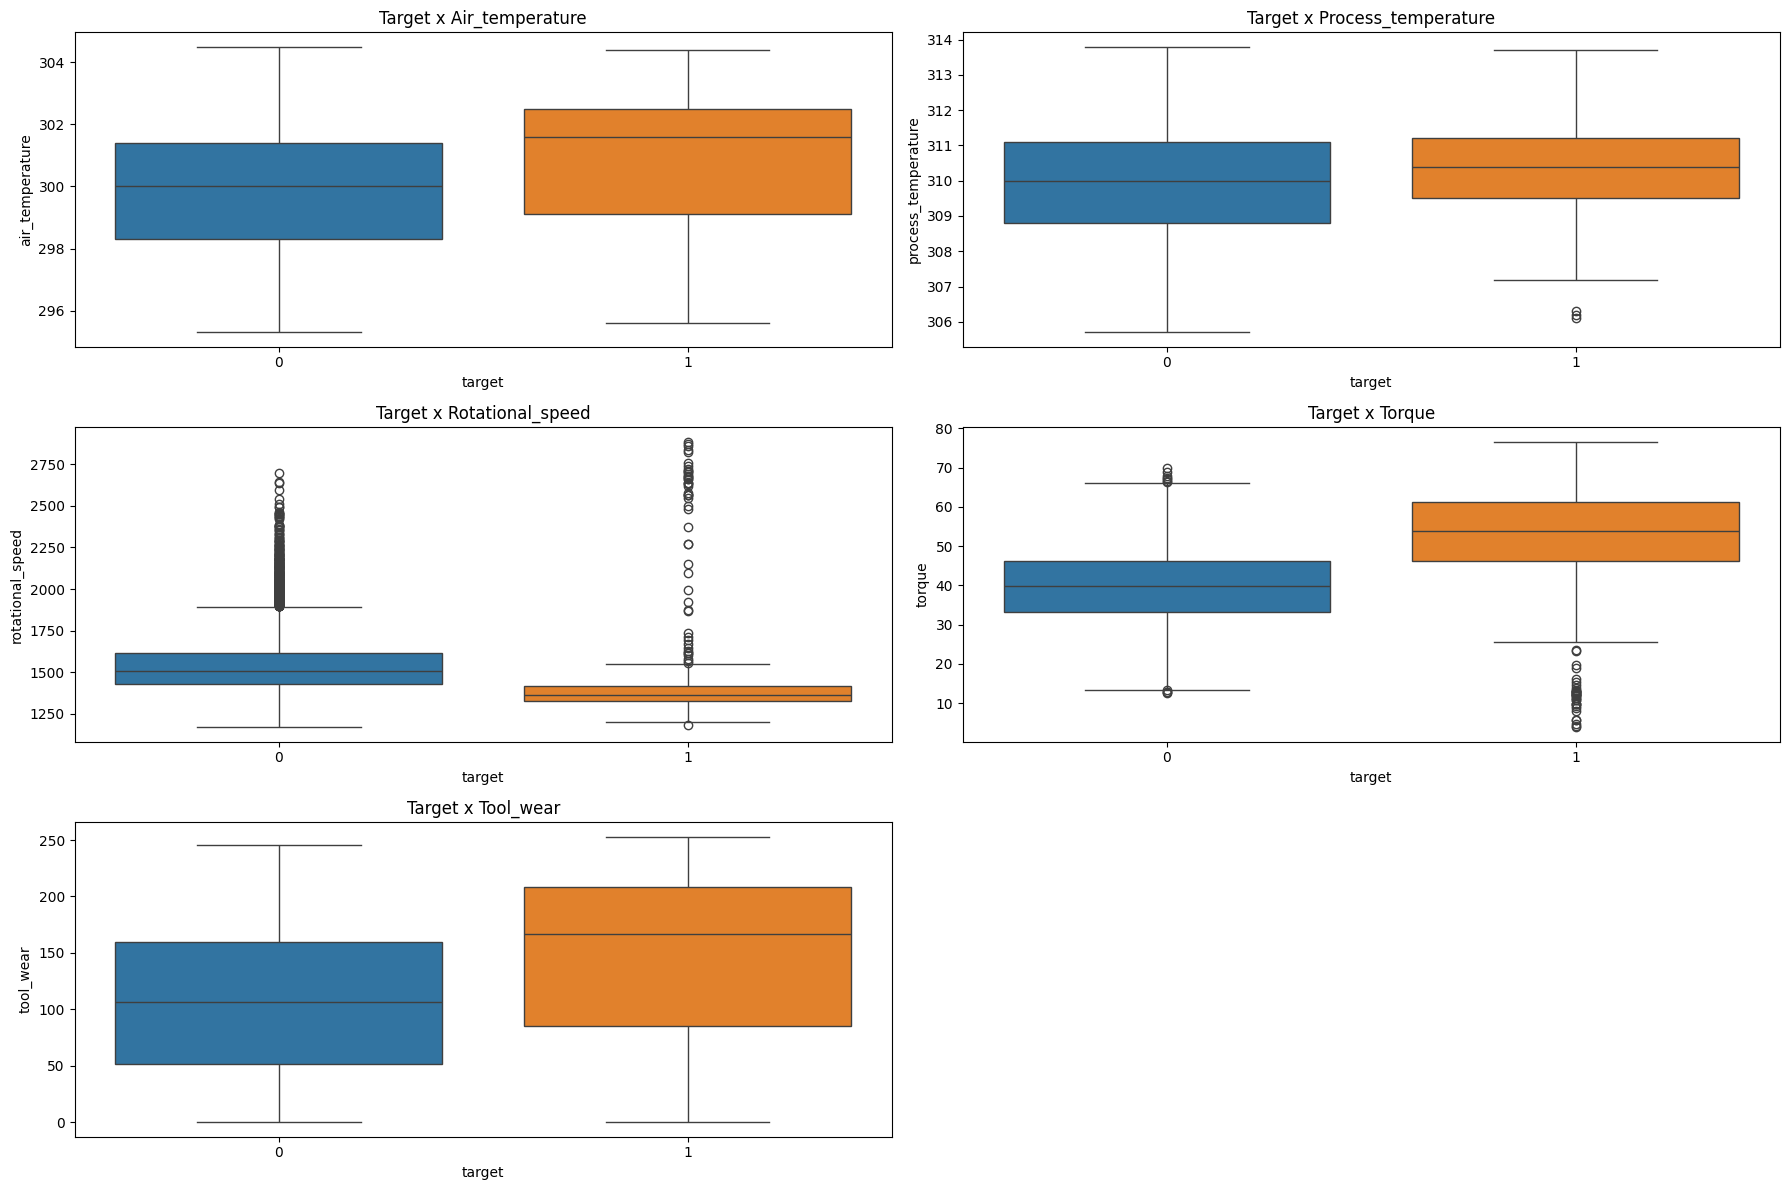

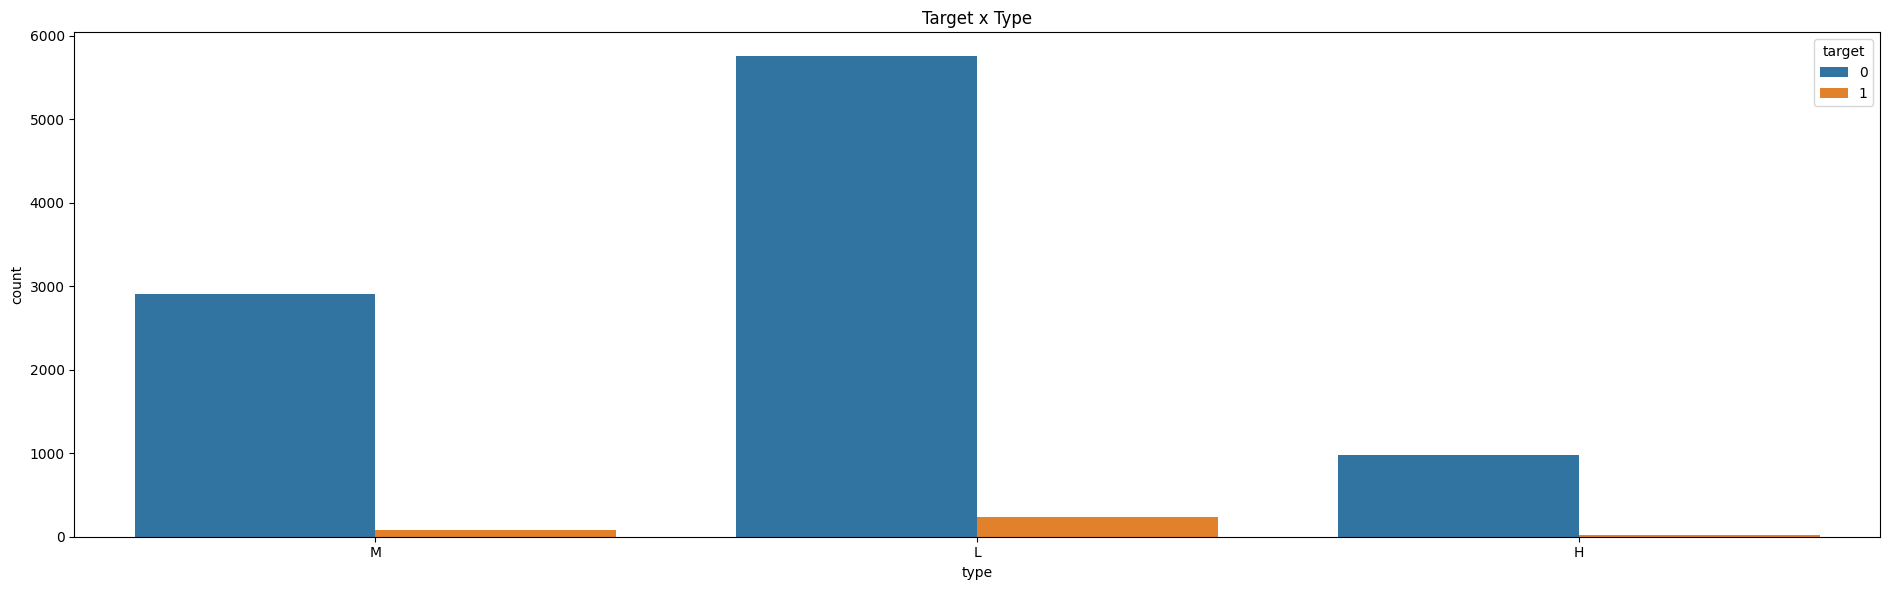

In [10]:
features_vs_targets(df, 3, 2)

### Observations:
- The `air_temperature` and `tool_wear` columns present a very similar behavior, with the majority of failures appearing when they have high values
- The `process_temperature` column didn't present a clear pattern in relation to the `target` column. The boxes of failure and no failure have very similar medians, with the failure box being more concentrated on the higher values of the process temperature, although, there are a few outliers when the temperature is low
- `Rotational_speed` and `torque` present opposite behaviors. Failures are very concentrated when `rotational_speed` indicates a low value and, when `torque` indicates high values
- The low quality product is the one with more failures, but that is expected since its the most produced type of product
### Impact:
- Since `rotational_speed` and `torque` columns showed opposite behaviors in relation to `target`, it will be useful to investigate these columns in a multivariable analysis
- Despite `process_temperature` not showing a significant difference between failure and no failure, it would be interesting to see how it behaves together with `air_temperature`
- Using the `type` column, it is possible to filter the data by the products and examine each column to see if any product is more affected by one or more columns

# Multivariable Analysis

## Type x Numericals

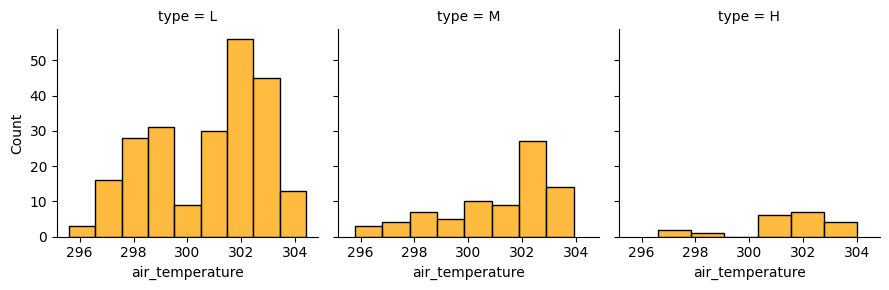

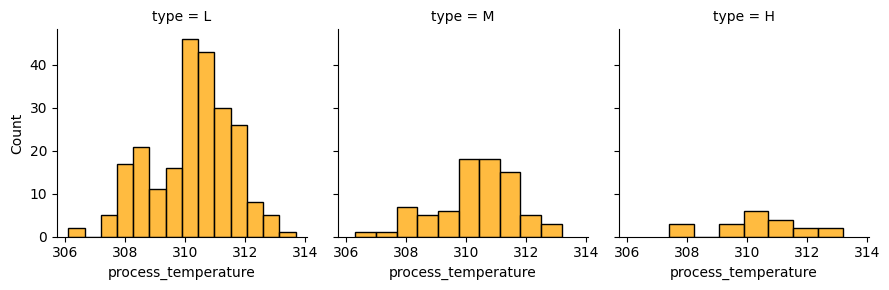

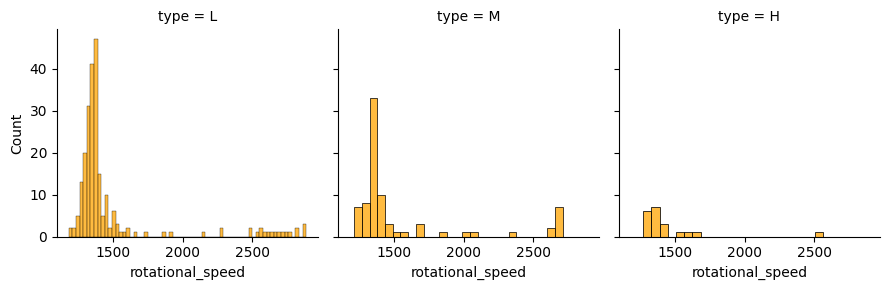

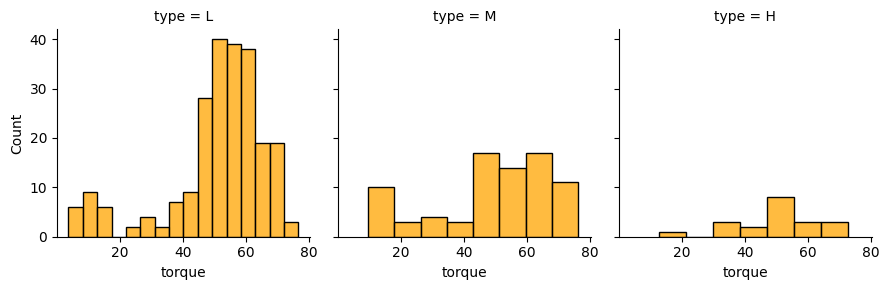

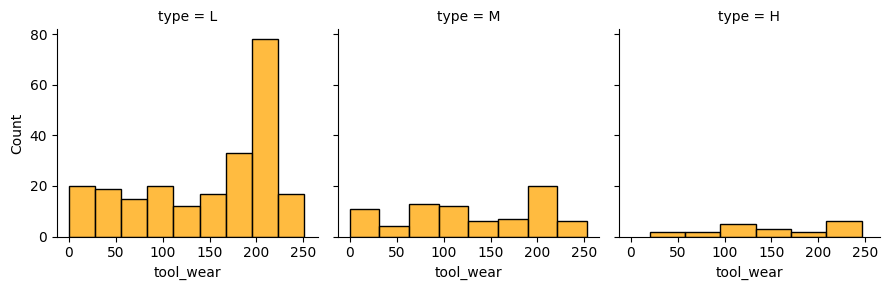

In [11]:
facegrid_hist_target(df=df, facecol="type", color="orange")

### Observations:
- All three types of products tend to have a spike in failures when `air_temperature` is high, especially when the temperature reaches 302K
- Low and medium quality products have an increase in failure when `process_temperature` reaches 310K, but the high quality products are considerably constant between all temperatures
- All three types of products have a spike in failures when the `rotational_speed` of the machine is below 1500 rpm
- Low and medium quality products have a spike in failures when the `torque` of the machine gets above 40 Nm. High quality products see this spike when `torque` reaches approximately 50 Nm
- When `tool_wear` reaches 200min, all products have a spike on failures

## Air Temperature x Numericals

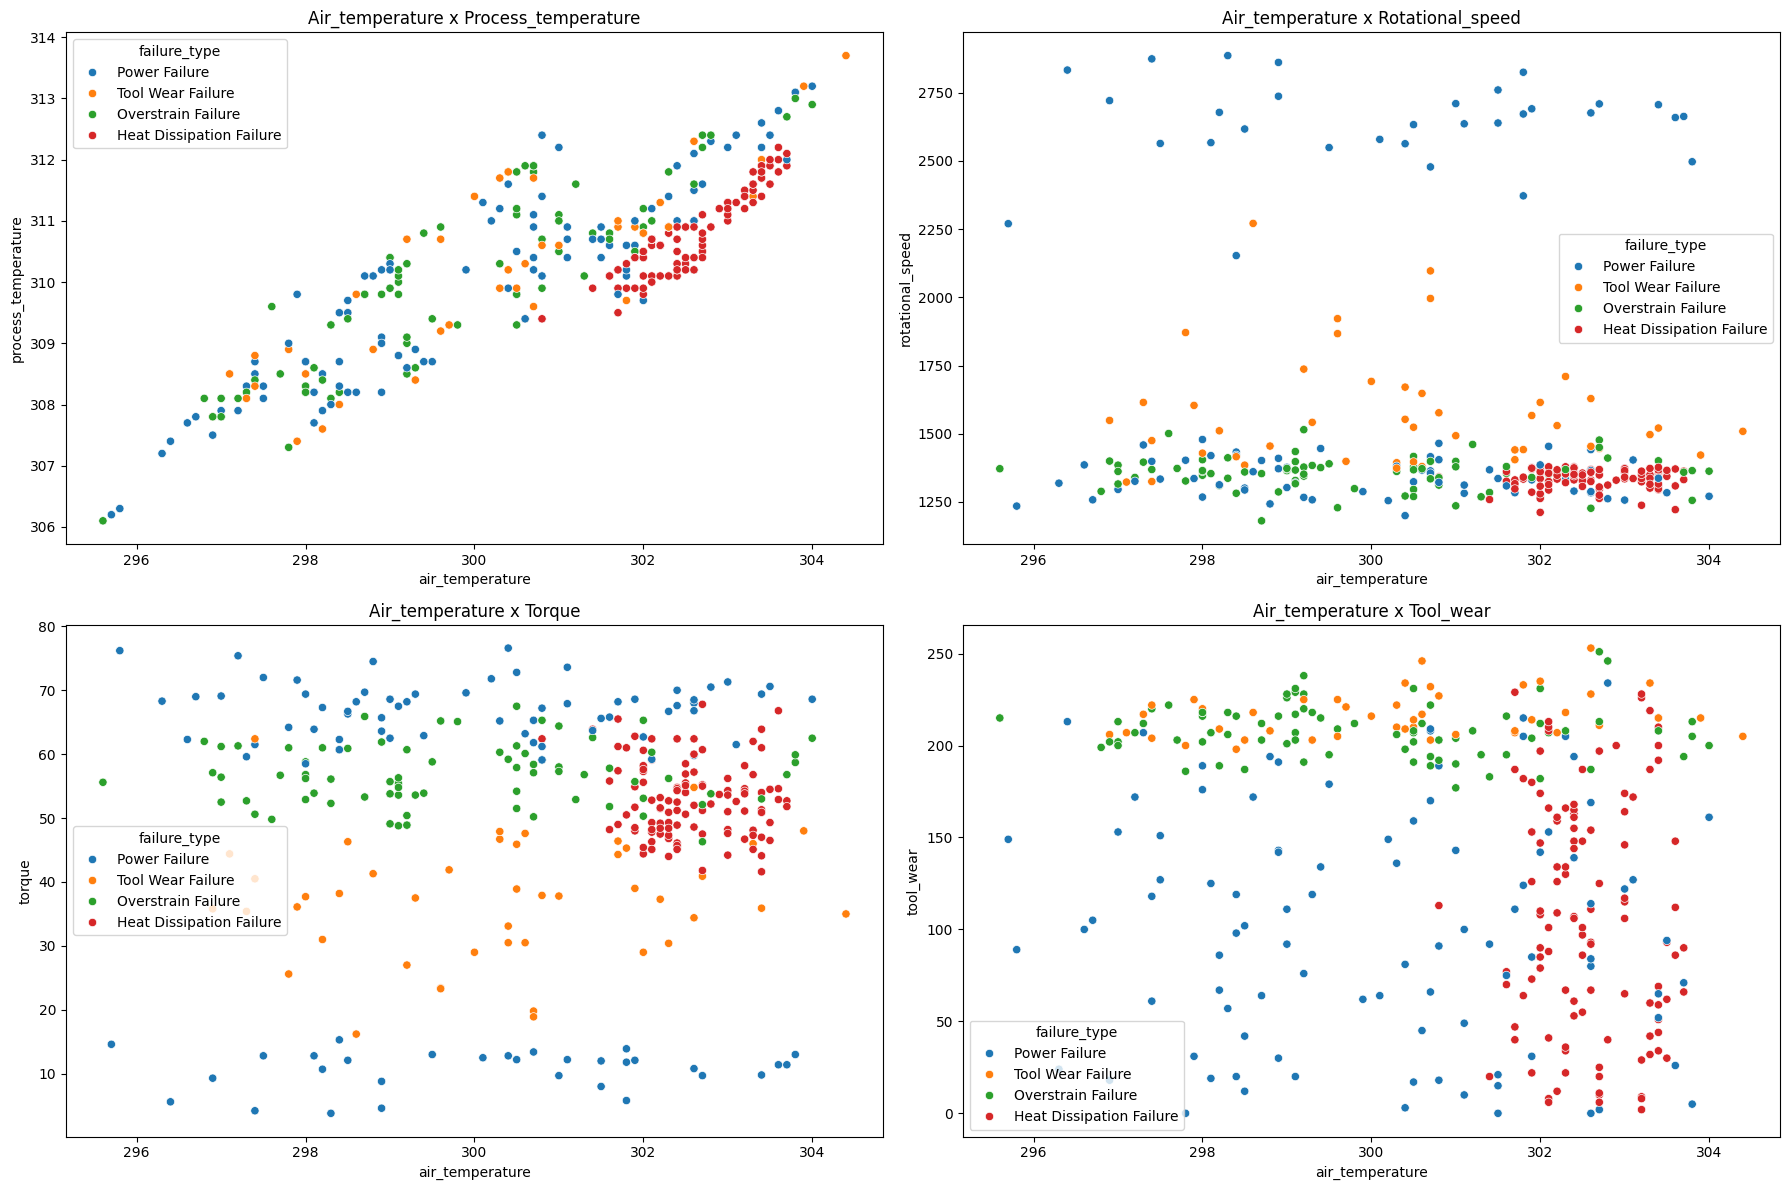

In [15]:
plot_scatter_numericals_target(df,2, 2, "air_temperature")

### Observations:
- When plotting both temperatures on the same graph, it's clear that the **heat dissipation** failure occurs only when `air_temperature` reaches 302K and `process_temperature` reaches 310K. All other failures don't show a pattern with the temperatures, happening with low and high values
- Regarding the other graphs, the same pattern appears. The **heat dissipation** failure only occurs when `air_temperature` is above 302K
### Impact:
- Since the **heat dissipation** failure is concentrated in one place, it could be interesting to create a new feature containing the temperature difference or a bool feature that is positive when `air_temperature` is above 302K

## Process Temperature x Numericals

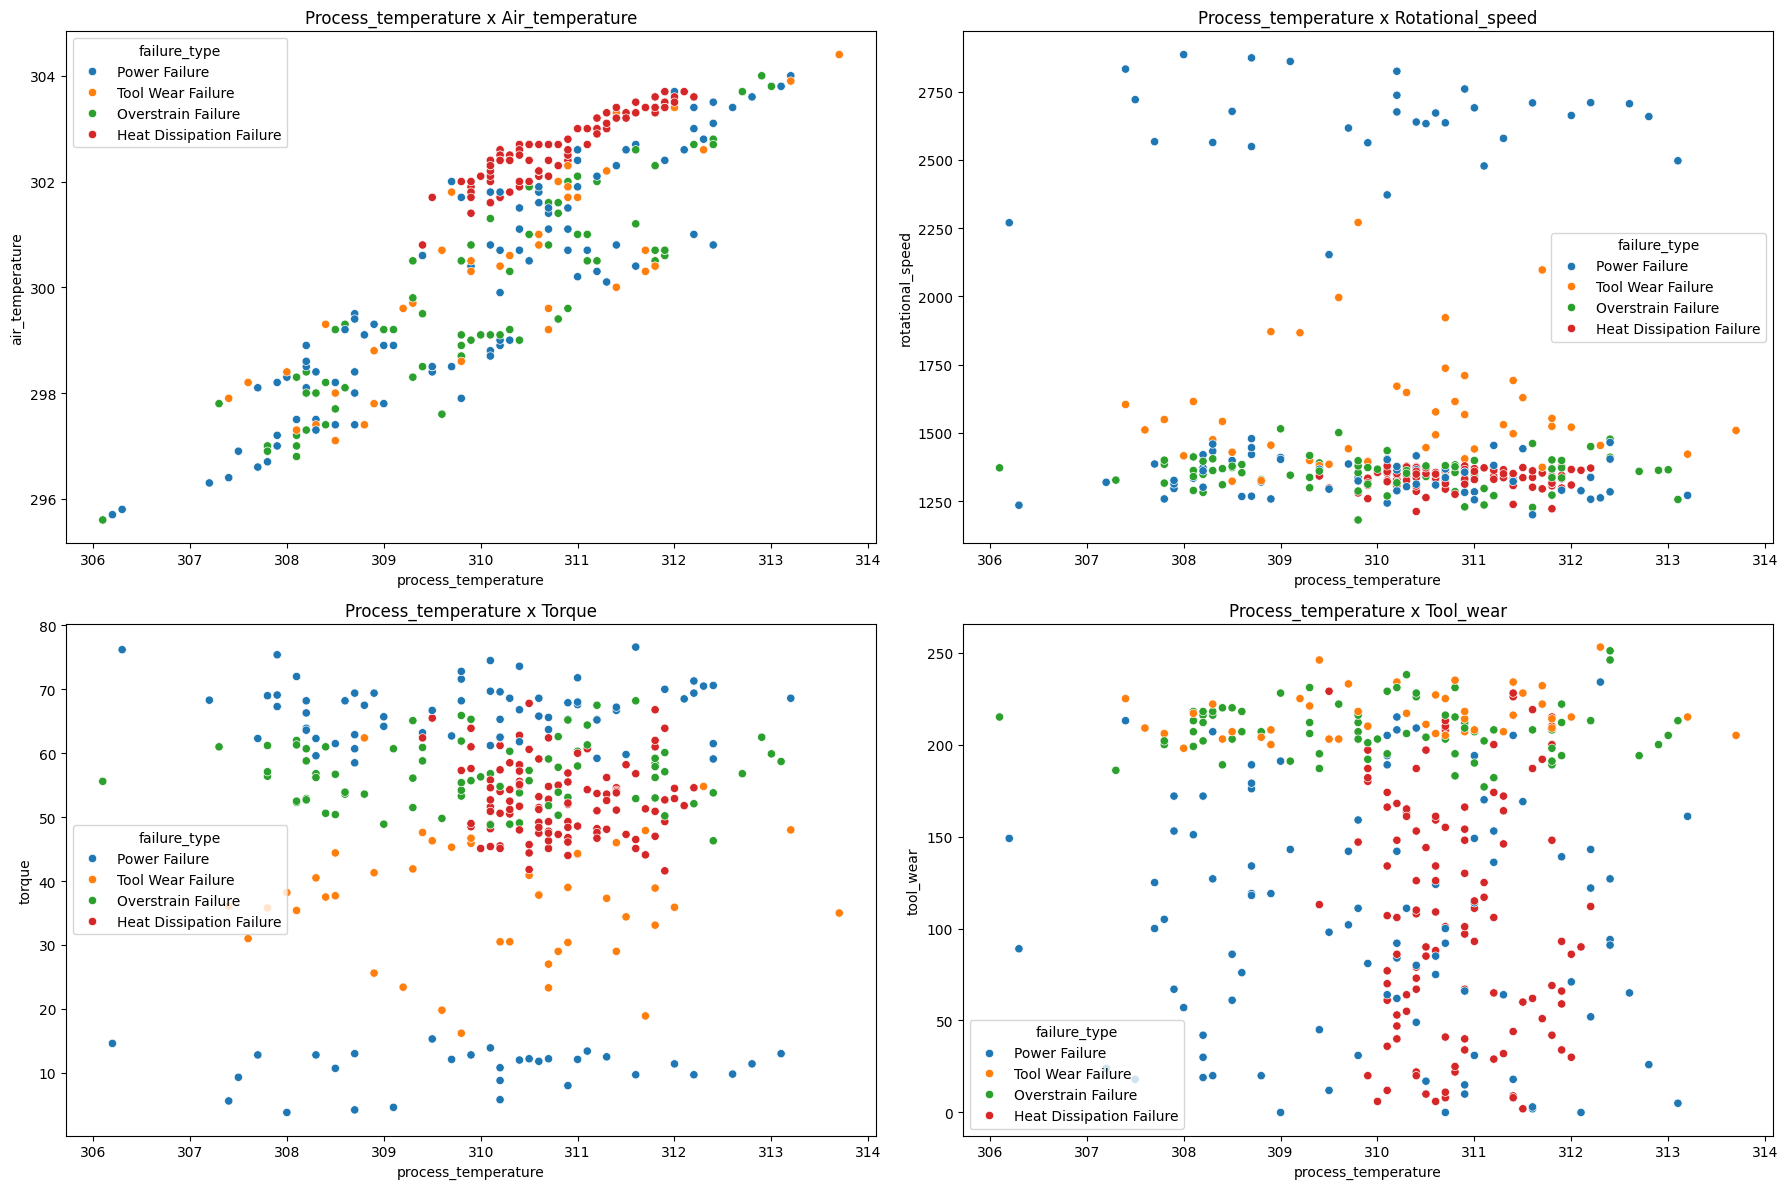

In [12]:
plot_scatter_numericals_target(df, 2, 2, "process_temperature")

### Observations:
- Very similar behavior to `air_temperature`, with the **heat dissipation** failure occurring when the temperature is between 310K and 312K

## Rotational Speed x Numericals

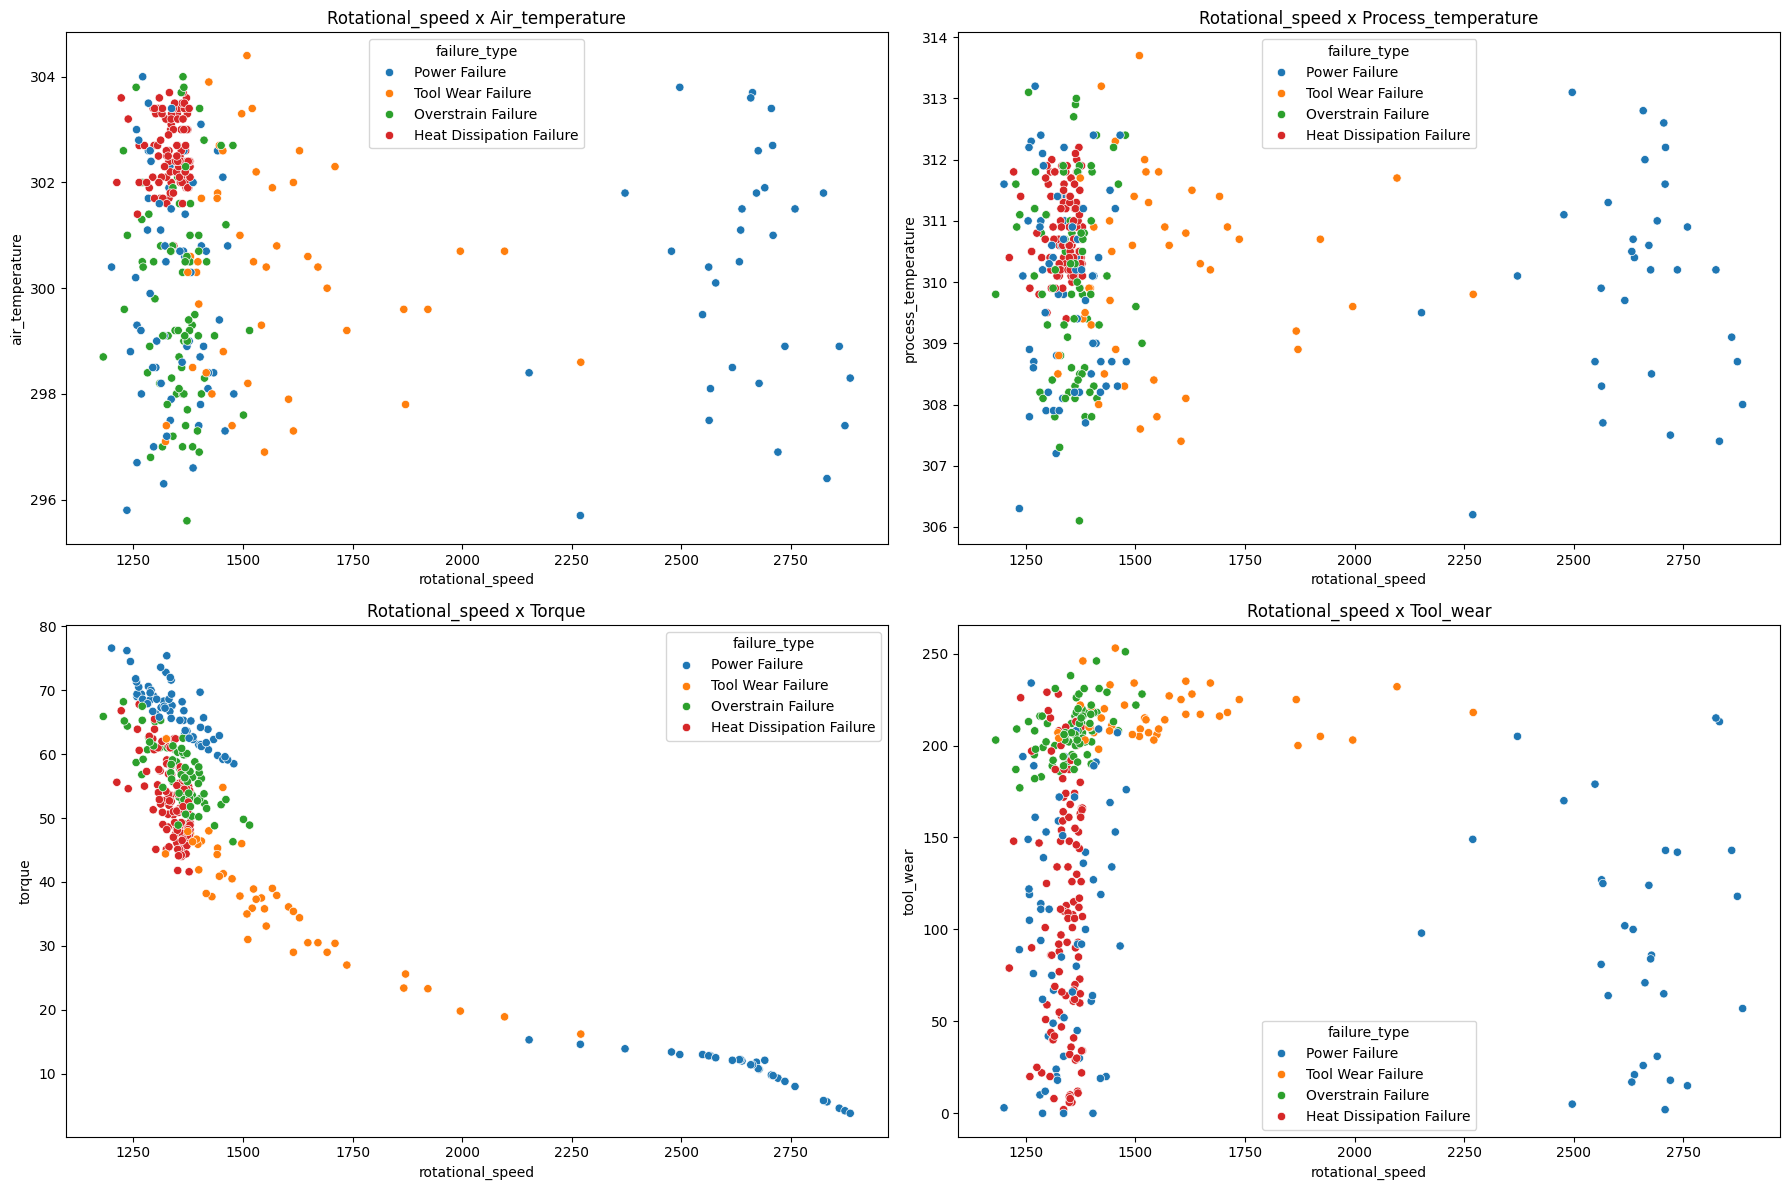

In [13]:
plot_scatter_numericals_target(df, 2, 2, "rotational_speed")

### Observations:
- This is an interesting feature. There are two types of failures that only occurs when `rotational_speed` is below 1500 rpm, with the **heat dissipation** failure completely dependent on the temperatures and the **overstrain** failure dependent on high `torque` and high `tool_wear`
- **Power** failure occurs only when `rotational_speed` is completely opposite to the value of `torque`
### Impact:
- Since `rotational_speed` and `torque` have opposite behaviors, it would be interesting to create a feature that represents power (rpm X torque) or a bool feature that is positive when the values of these columns are within the failure threshold

## Torque x Numericals

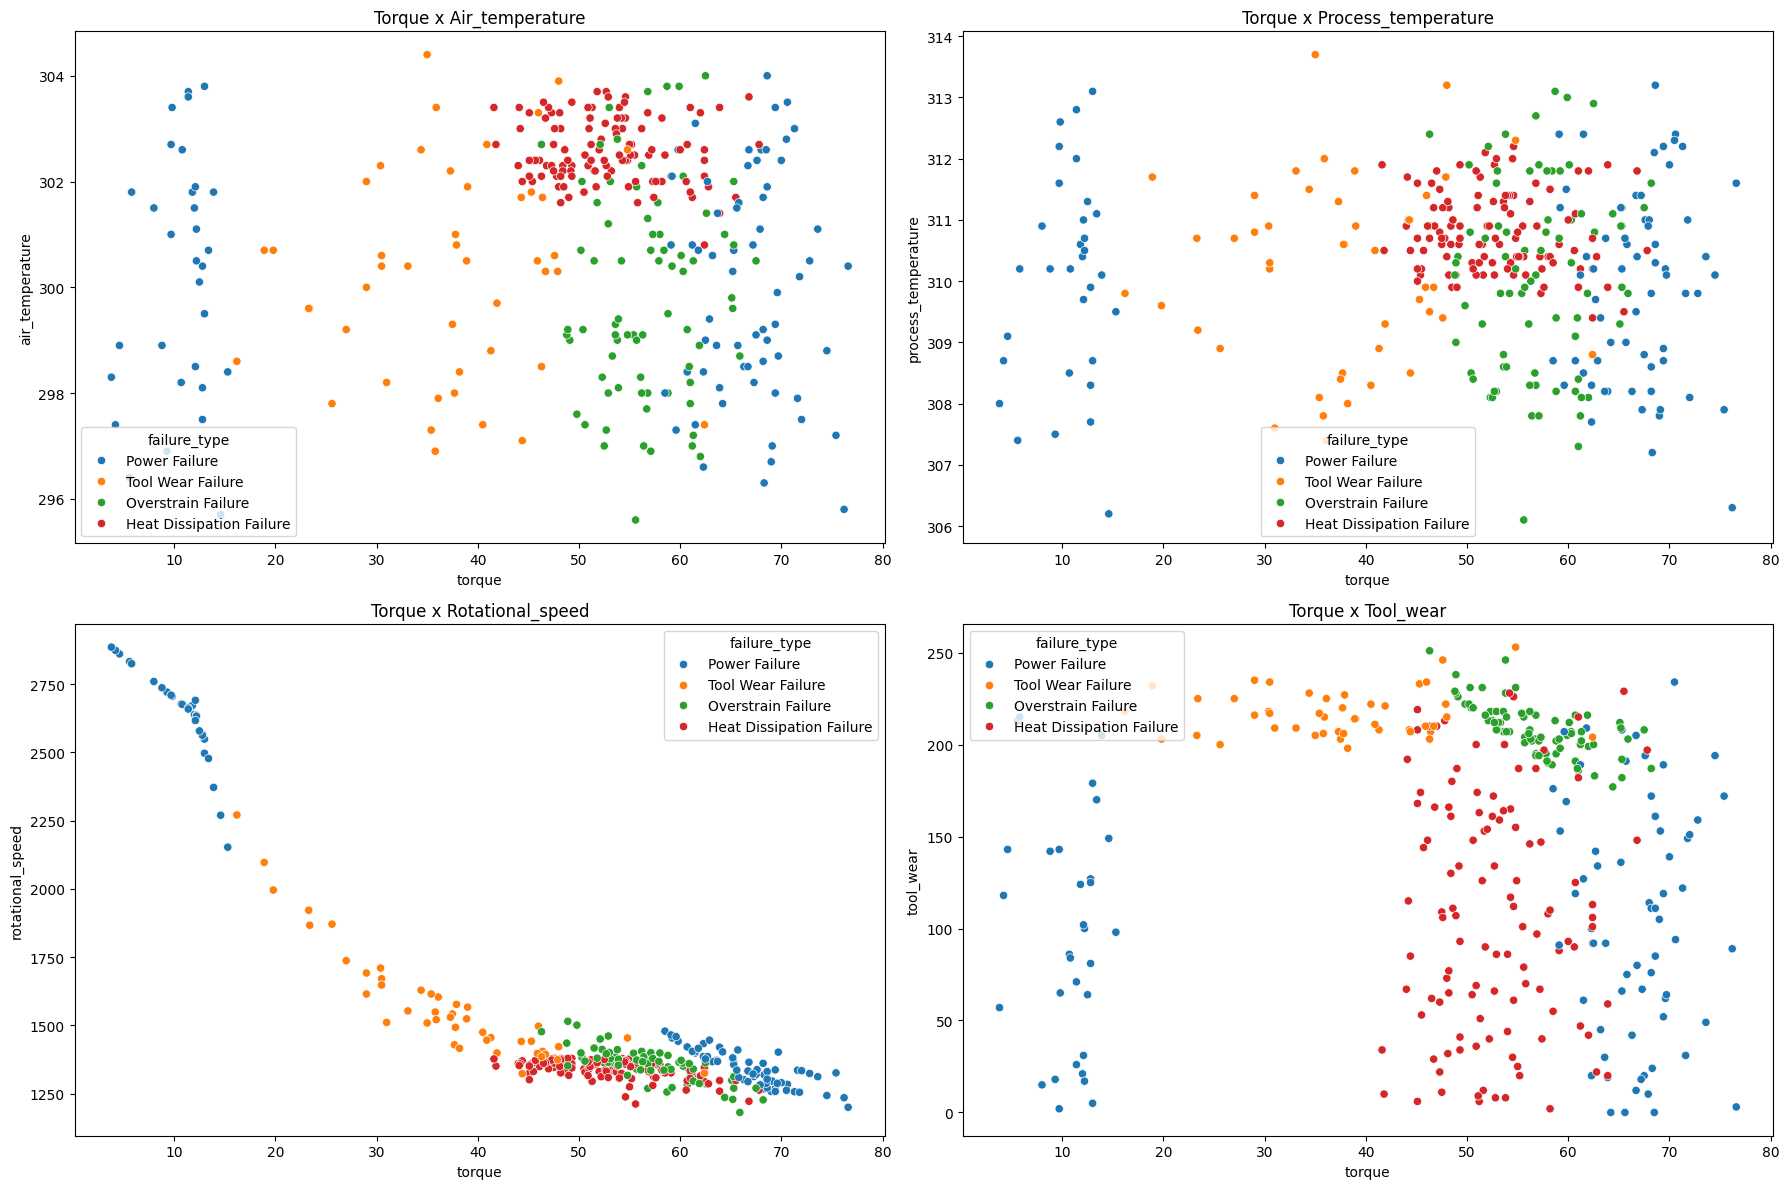

In [14]:
plot_scatter_numericals_target(df, 2, 2, "torque")

### Observations
- Complete opposite behavior in relation to `rotational_speed`, with the majority of failures occurring when `torque` value is high

## Tool Wear x Numericals

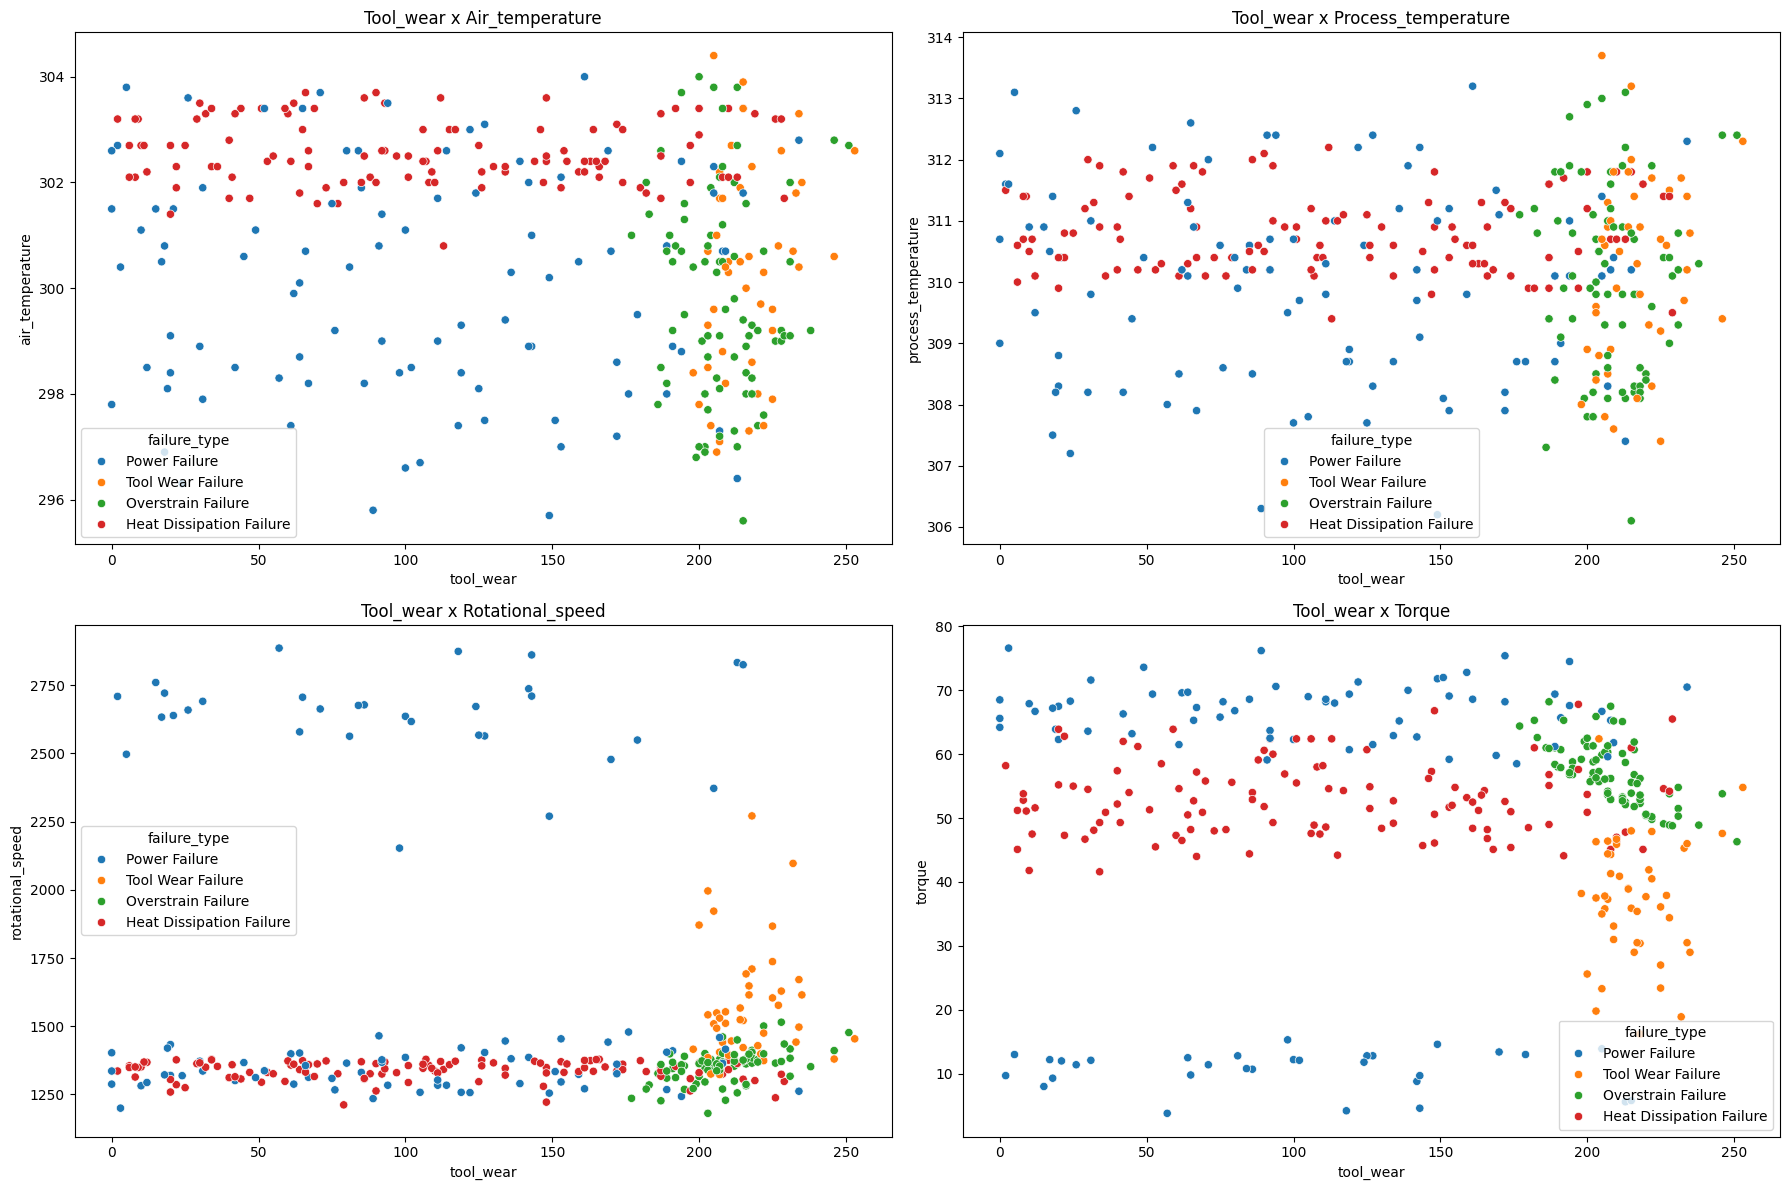

In [16]:
plot_scatter_numericals_target(df, 2, 2, "tool_wear")

### Observations:
- The **tool wear** failure is only related to `tool_wear` values. This and the **overstrain** failure occurs only when `tool_wear` is too high, approximately above 180min, with the **tool wear** failure being independent in relation to the other features

# Summary

### Main Insights:
- The `target` column is extremely unbalanced, with more than 96% of all data on the "no failure" class, determined by the 0
- The `air_temperature` and `tool_wear` columns present a very similar behavior, with the majority of failures appearing when they have high values
- `Rotational_speed` and `torque` present opposite behaviors. Failures are very concentrated when `rotational_speed` indicates a low value and, when `torque` indicates high values
- There are two types of failures that only occurs when `rotational_speed` is below 1500 rpm, with the **heat dissipation** failure completely dependent on the temperatures and the **overstrain** failure dependent on high `torque` and high `tool_wear`

### Implications for Feature Engineering and Modelling
- Class balancing methods needs to be used
- Data will need to be scaled
- Since `rotational_speed` and `torque` have opposite behaviors, it would be interesting to create a feature that represents power (rpm X torque) to better detect all failures that are directly dependent on these columns values
- Since **heat dissipation** failure is concentrated in one place, it could be interesting to create a new feature containing the temperature difference
